In [15]:
import numpy as np
import subprocess

prefix = 'AcousticMonopole'
forwardFile = prefix+'.forward_run.txt'
adjointFile = prefix+'.adjoint_run.txt'

In [16]:
subprocess.check_call('./forward --output '+forwardFile, shell=True)
fQoI0 = open(forwardFile,'r')
QoI0 = float(fQoI0.read())
fQoI0.close()
print ("QoI0: ", QoI0)

QoI0:  0.00628940478932025


In [17]:
subprocess.check_call('./adjoint --output '+adjointFile, shell=True)
fGrad0 = open(adjointFile,'r')
Grad0 = float(fGrad0.read())
fGrad0.close()
print ("Grad0: ", Grad0)

Grad0:  1.424686833913875e-14


In [7]:
ic_grad_file = prefix + '-00000020.adjoint.q'
grad_norm_file = prefix + '.spatial_inner_product.txt'
subprocess.check_call('./spatial_inner_product '+ic_grad_file+' '+ic_grad_file, shell=True)
fQoI0 = open(forwardFile,'r')
Grad0 = float(fQoI0.read())
fQoI0.close()
print ("ic_grad0: ", Grad0)

ic_grad0:  2.789567294993506e-07


In [18]:
Nk = 20
# Ak = np.zeros((Nk,),dtype=np.double)
Ak = 10.0**(6.0-0.25*np.array(range(Nk)))
QoIk = np.zeros((Nk,),dtype=np.double)
Gradk = np.zeros((Nk,),dtype=np.double)
ek = np.zeros((Nk,),dtype=np.double)

forwardFile = prefix+'.forward_run.txt'

In [19]:
baseline_control_forcing_file = ['']
grad_file = [prefix+'.gradient_controlRegion.dat']
control_forcing_file = [prefix+'.control_forcing_controlRegion.dat']

In [20]:
forwardFile1 = prefix+'.forward_run.1.txt'

fId = open(prefix+'.gradient_accuracy.txt','w')
for k in range(Nk):
    i = 0
    actuation_amount = Ak[k]
    command = './zaxpy '+control_forcing_file[i]+' '+"{:.16E}".format(actuation_amount)+' '+grad_file[i]+' '+baseline_control_forcing_file[i]
    subprocess.check_call(command, shell=True)
    subprocess.check_call('./forward --output '+forwardFile1, shell=True)
    fQoI1 = open(forwardFile1,'r')
    QoIk[k] = float(fQoI1.read())
    fQoI1.close()

    Gradk[k] = (QoIk[k]-QoI0)/Ak[k]
    ek[k] = abs( (Gradk[k]-Grad0)/Grad0 )
    fId.write("{:.16E}".format(actuation_amount)+'\t'
                +"{:.16E}".format(QoIk[k])+'\t'
                +"{:.16E}".format(Gradk[k])+'\t'
                +"{:.16E}".format(ek[k]))
    print ("{:.16E}".format(actuation_amount), "{:.16E}".format(QoIk[k]), "{:.16E}".format(Gradk[k]), "{:.16E}".format(ek[k]))

fId.close()

1.0000000000000000E+06 6.2894190361991176E-03 1.4246878867613110E-14 7.3900271328715553E-07
5.6234132519034913E+05 6.2894128009264062E-03 1.4246874269029406E-14 4.1622414931931318E-07
3.1622776601683791E+05 6.2894092945766523E-03 1.4246871674380506E-14 2.3410350086123269E-07
1.7782794100389228E+05 6.2894073228118470E-03 1.4246870220536174E-14 1.3205691087987161E-07
1.0000000000000000E+05 6.2894062140071922E-03 1.4246869422043785E-14 7.6010040098190233E-08
5.6234132519034909E+04 6.2894055904805686E-03 1.4246868987812362E-14 4.5530961281689631E-08
3.1622776601683792E+04 6.2894052398457974E-03 1.4246868739543153E-14 2.8104730952166653E-08
1.7782794100389227E+04 6.2894050426693833E-03 1.4246868737765991E-14 2.7979990442028170E-08
1.0000000000000000E+04 6.2894049317889361E-03 1.4246868615397367E-14 1.9390830961280262E-08
5.6234132519034911E+03 6.2894048694362801E-03 1.4246868679330056E-14 2.3878321671901861E-08
3.1622776601683795E+03 6.2894048343728054E-03 1.4246868958970244E-14 4.350650810

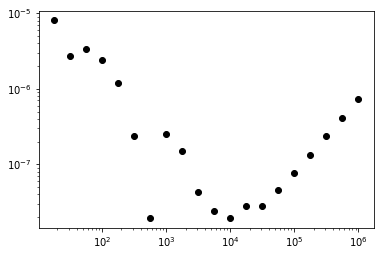

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.loglog(Ak,ek,'ok')